# Bepaling van warmtecapaciteit van een onbekend materiaal


# Introductie

Onbekende materialen kunnen geïdentificeerd worden door hun eigenschappen te meten. Een van deze eigenschappen is de warmtecapaciteit. In dit practicum gaan we de warmtecapaciteit van een onbekend materiaal bepalen door middel van een calorimeter experiment. Daarbij wordt een bepaalde massa van het materiaal naar een bekende temperatuur gebracht waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaatst. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend.

# Theorie

De soortelijke warmte $c$ van een materiaal is gedefinieerd als de hoeveelheid warmte $Q$ die nodig is om de temperatuur $T$ van een kilogram van het materiaal met één graad Celsius (of één Kelvin) te verhogen:

$$
    c = \frac{Q}{m \Delta T}
$$ (eq:heat_capacity)

Waarbij $Q$ de hoeveelheid warmte in Joules is, $m$ de massa in kilogram is en $\Delta T$ de verandering in temperatuur is. Gegeven de wet van Black, die stelt dat de totale hoeveelheid warmte in een geïsoleerd systeem constant blijft, kunnen we de warmte die het onbekende materiaal verliest gelijkstellen aan de warmte die het water opneemt:

$$
    Q_{materiaal} = -Q_{water} 
$$ (eq:black)

wanneer we de massa's en de begintemperaturen van beide systemen kennen, maar slechts een van de twee soortelijke warmtes, kunnen we de onbekende soortelijke warmte berekenen. We combineren vergelijkingen [](#eq:heat_capacity) en [](#eq:black) om de volgende vergelijking te krijgen:

$$
    T_e = \frac{c_w m_w T_{w,b}+c_m m_m T_{m,b}}{c_w m_w + c_m m_m}
$$ (eq:combined)

Waarbij de subscripts $b$ en $e$ respectievelijk staan voor begintoestand en eindtoestand, $w$ voor water en $m$ voor het onbekende materiaal.

Bij metingen aan verschillende massa's van het onbekende materiaal en vervolgens een least square fit aan bovenstaande vergelijking kunnen we een precieze waarde voor de soortelijke warmte van het onbekende materiaal bepalen. Dat is, wanneer de warmtecapaciteit van bijvoorbeeld de beker te verwaarlozen is.


# Methode en materialen

## Ontwerp
De bovenstaande theorie wordt gebruikt om de soortelijke warmte van een onbekend materiaal te bepalen. Het experiment bestaat uit het verwarmen van verschillende massa's van het onbekende materiaal tot een bekende temperatuur, waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaats. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend. Om de tijd voor het meten van meerdere materialen te reduceren, worden de data van de verschillende groepen in het lokaal samengevoegd. Van tevoren is afgesproken welke massa's door welke groep worden gemeten, en hoeveel water er gebruikt wordt.

## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Calorimeter
- Thermometer of temperatuursensor
- Verwarmingsbron 
- Diverse massablokjes van onbekend materiaal
- Weegschaal
- Water
- Maatcilinder of maatbeker


```{figure} figures/c_onbekend_setup.jpg
:width: 70%
:label: fig_c_onbekend_setup

Een schematische weergave van de opstelling
```


## Procedure
Bespreek wie welke massa's van het onbekende materiaal gaat meten.
Bespreek ook hoeveel water er gebruikt gaat worden.
Bepaal de begintemperaturen.
Hevel het aantal afgesproken massa's in de maatbeker. 
Roer voorzicht zodat de temperatuur homogeen is.
Noteer de hoogste gemeten temperatuur, dit is $T_e$.
Wissel de metingen uit met de andere groepen en voer de data-analyse uit.

```{note}
Hieronder staat een voorbeeld hoe je een grafiek moet opslaan en vervolgens in je document kunt oproepen.
Het voorbeeld kun je natuurlijk straks verwijderen.
```

# Resultaten


In [2]:
# Water op kamertemperatuur: 21,7 graden
# temperatuur blokjes: 68,5 graden
# water na toevoeging blokjes: 24,7 graden

De soortelijke warmte van het materiaal is 432 J/kg K.
De soortelijke warmte van het materiaal is 419.0 +/- 4.42 J/kg K


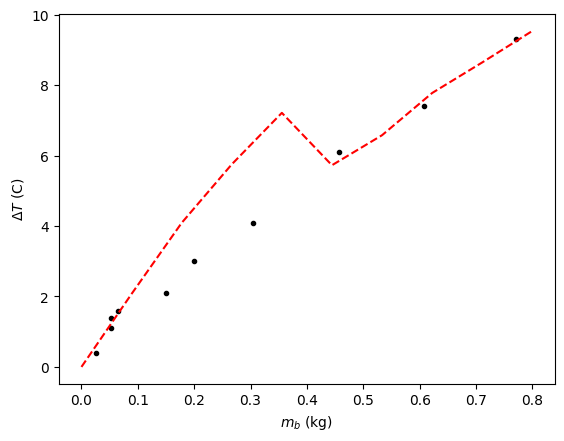

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Deel 1: alleen eigen meting

# Definiëren van de variabelen
Twb = 21.7 + 273.15 #K
Tmb = 68.5 + 273.15 #K
mb = 0.05*4 #kg
cw = 4186
mw = 0.301 #kg
Te = 24.7 + 273.15


# De vergelijking voor het bepalen van de onbekende soortelijke warmte
def soortelijk(Te):
    return ((Twb*cw*mw)-(Te*cw*mw))/((Te*mb)-(mb*Tmb))

print('De soortelijke warmte van het materiaal is', int(np.round(soortelijk(24.7+ 273.15))), 'J/kg K.')

# Deel 2: Metingen van verschillende groepjes vergelijken
Twbarray = np.array([21.7, 21.3, 22.6, 23.8, 24.8, 20.7, 20.7, 18.8, 19.3, 19.5]) + 273.15
Tmbarray = np.array([68.5, 70, 72.7, 72.7, 72.6, 64.2, 64.0, 64.1, 64.2, 64.3]) + 273.15
mbarray = np.array([mb, 0.0653, 0.0519, 0.0519, 0.0262, 0.1497, 0.3050, 0.4578, 0.6072, 0.7705])
mwarray = np.array([mw, 0.2, 0.2, 0.2, 0.2, 0.2931, 0.2976, 0.3001, 0.2981, 0.2956])

Tearray = np.array([24.7, 22.9, 24.0, 24.9, 25.2, 22.8, 24.8, 24.9, 26.7, 28.8]) + 273.15

def eindtemp(mbarray, c):
    return ((cw*mwarray*Twbarray)+(c*mbarray*Tmbarray))/((cw*mwarray) + (c*mbarray))

val, cov = curve_fit(eindtemp, mbarray, Tearray)
c = val[0]
u_c = np.sqrt(cov[0,0])

deltatemp = Tearray - Twbarray


mb_test = np.linspace(0, 0.8, 10)
Te_test = eindtemp(mb_test, val[0])
delta_test = Te_test - Twbarray


plt.figure()
plt.xlabel('$m_b$ (kg)')
plt.ylabel('$ΔT$ (C)')
plt.plot(mbarray, deltatemp, 'k.')
plt.plot(mb_test, delta_test, 'r--')
print('De soortelijke warmte van het materiaal is', np.round(c, 0), '+/-', np.round(u_c, 3), 'J/kg K')




```{figure} figures/naam.png
:width: 50%
:label: fig_naam 

Hier is het onderschrift van de figuur.
```

# Discussie en conclusie

Hier een korte discussie en conclusie over de resultaten van het experiment en de implicaties daarvan.

# Discussie
De gevonden waarde voor de soortelijke warmte van het materiaal gebaseerd op de eigen meting is 432 J/kg K, en gebaseerd op een fit van de metingen van verschillende groepen volgt 419 +/- 4.42 J/kg K. Het materiaal is onbekend, dus het is onzeker hoe strijdig deze is met de echte waarde. Aangezien het materiaal duidelijk een metaal is, lijkt de gevonden soortelijke warmte wel in het goede gebied te liggen wanneer deze wordt vergeleken met soortelijke warmtes van andere metalen. Als voorbeeld: veelgebruikte metalen zoals ijzer, constantaan, en koper hebben soortelijke warmtes van respectievelijk 448, 410, en 380 J/kg K. Bij een aanname dat het materiaal ijzer was, wat goed mogelijk is aan de hand van het uiterlijk, ligt de gevonden waarde in de buurt van de literatuurwaarde.
Verbeteringen in het onderzoek zijn om meer metingen met meer verschil in de massa van de blokjes te maken, op het moment liggen de massa's van de blokjes vrij dicht bij elkaar wat een onnauwkeurigheid kan leveren in de resultaten door te weinig variatie.
De curvefit van de grafiek klopt niet, dit komt omdat de functie afhangt van teveel variabelen die bij elk groepje verschillend zijn genomen. Hierdoor zijn er in de grafiek rare gebieden te zien zoals op de massa 350 gram. Wanneer de proef zou worden uitgevoerd met verschillende massa's, maar wel dezelfde begintoestand voor de rest van de variabelen, zou deze wel kloppen.

# Conclusie
Dit onderzoek is uitgevoerd met het doel om de soortelijke warmte van een onbekend materiaal te bepalen. Het materiaal wat gebruikt werd waren 4 metalen blokjes, deze hadden samen een massa van 200 gram. De massa's werden eerst opgewarmd tot een bekende temperatuur, waarna ze werden toegevoegd aan water op kamertemperatuur en erdoorheen geroerd. Uit een least squares fit volgt dat de soortelijke warmte van het onbekende materiaal gelijk is aan 432 J/kg K. De echte waarde is niet bekend, maar het materiaal was duidelijk metaal, en de soortelijke warmte komt inderdaad overeen met de soortelijke warmtes van veelgebruikte metalen. Een vervolgonderzoek zou verbeterd kunnen worden door meer metingen met meer verschillende massa's van de blokjes te gebruiken, waardoor er meer variatie is in het onderzoeksgebied en er nauwkeurige resultaten verkregen kunnen worden.